In [7]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import pandas as pd


In [8]:
caminho1="blues/blues.00036.wav"
caminho2="/home/pedro/códigos/PLN_grupo/archive/Data/genres_original/blues/blues.00037.wav"
caminho3="/home/pedro/códigos/PLN_grupo/archive/Data/genres_original/blues/blues.00038.wav"

In [9]:
ipd.Audio(caminho1)

isso aqui me dá 

In [10]:
blues1, sr = librosa.load(caminho1)
blues2, sr = librosa.load(caminho2)
blues3, sr = librosa.load(caminho3)

In [11]:
blues1.size

661794

In [12]:
#sample duration
sd = 1/sr
#duration of audio
len(blues1)*sd


30.013333333333335

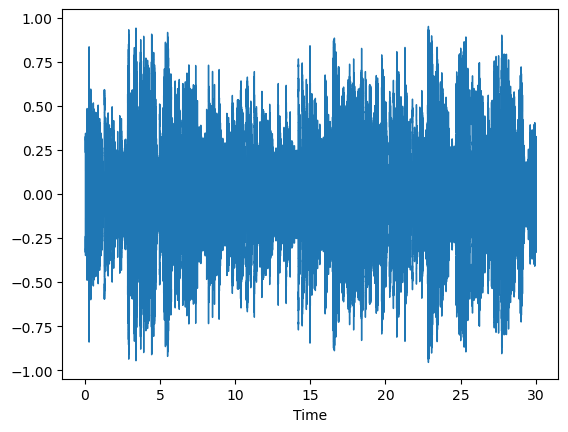

In [13]:
librosa.display.waveshow(blues1)

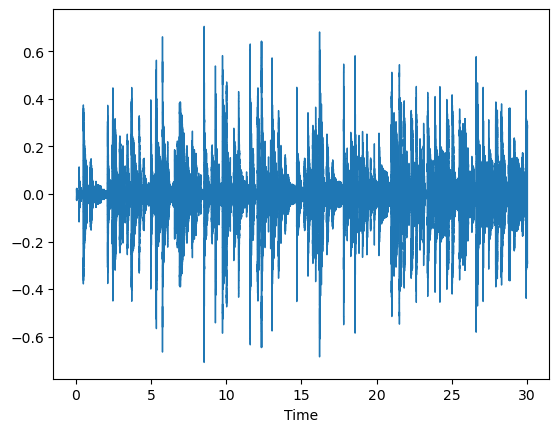

In [14]:
librosa.display.waveshow(blues2)

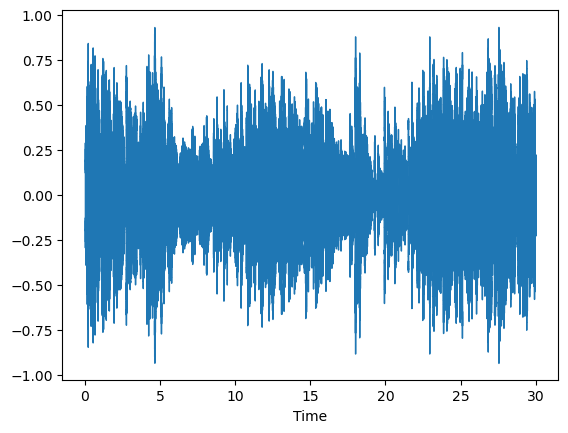

In [15]:
librosa.display.waveshow(blues3)

In [16]:
rmse = librosa.feature.zero_crossing_rate(blues1)
rmse

array([[0.00878906, 0.01367188, 0.01757812, ..., 0.05078125, 0.04541016,
        0.03320312]], shape=(1, 1293))

In [17]:
rmse_blues = librosa.feature.rms(y=blues1, frame_length = 1024, hop_length = 512)
rmse_blues.shape

(1, 1293)

In [18]:
np.mean(rmse_blues[0])

np.float32(0.19534408)

In [27]:

def pegar_bulk_rmse(genero):
    lst = []
    for i in range(100):
        caminho = "{}/{}.{:05d}.wav".format(genero,genero, i)
        y, sr = librosa.load(caminho)
        media = librosa.feature.rms(y=y, frame_length = 1024, hop_length = 512)[0].mean()
        lst.append(media)
    return lst    





In [ ]:
def pegar_bulk_zcr(genero):
    lst = []
    for i in range(100):
        caminho = "{}/{}.{:05d}.wav".format(genero,genero, i)
        y, sr = librosa.load(caminho)
        media = librosa.feature.zero_crossing_rate(y=y, frame_length = 1024, hop_length = 512)[0].mean()
        lst.append(media)
    return lst  

In [ ]:
df = pd.DataFrame()

serie1 = pd.Series(pegar_bulk_zcr("blues"))
serie2 = pd.Series(pegar_bulk_zcr("country"))
serie3 = pd.Series(pegar_bulk_zcr("hiphop"))
serie4 = pd.Series(pegar_bulk_zcr("metal"))
serie5 = pd.Series(pegar_bulk_zcr("reggae"))
serie6 = pd.Series(pegar_bulk_zcr("classical"))
serie7 = pd.Series(pegar_bulk_zcr("disco"))
serie8 = pd.Series(pegar_bulk_zcr("jazz"))
serie9 = pd.Series(pegar_bulk_zcr("pop"))
serie10 = pd.Series(pegar_bulk_zcr("rock"))

serie_total=pd.concat([serie1,serie2,serie3,serie4,serie5,serie6,serie7], axis=0, ignore_index=True)





In [ ]:
df.insert(0, "zcr", serie_total)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   zcr     700 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


In [50]:
serie1 = pd.Series(pegar_bulk_rmse("blues"))
serie2 = pd.Series(pegar_bulk_rmse("country"))
serie3 = pd.Series(pegar_bulk_rmse("hiphop"))
serie4 = pd.Series(pegar_bulk_rmse("metal"))
serie5 = pd.Series(pegar_bulk_rmse("reggae"))
serie6 = pd.Series(pegar_bulk_rmse("classical"))
serie7 = pd.Series(pegar_bulk_rmse("disco"))
serie8 = pd.Series(pegar_bulk_rmse("jazz"))
serie9 = pd.Series(pegar_bulk_rmse("pop"))
serie10 = pd.Series(pegar_bulk_rmse("rock"))

serie_total=pd.concat([serie1,serie2,serie3,serie4,serie5,serie6,serie7], axis=0, ignore_index=True)

In [ ]:
df.insert(0, "rmse", serie_total)


ValueError: cannot insert rmse, already exists

In [53]:
df.columns

Index(['rmse', 'zcr'], dtype='object')

In [54]:
def lista_genero(genero):
    lst1 =[]
    for i in range(100):
        lst1.append(genero)
    return lst1

In [55]:
serie1 = pd.Series(lista_genero("blues"))
serie2 = pd.Series(lista_genero("country"))
serie3 = pd.Series(lista_genero("hiphop"))
serie4 = pd.Series(lista_genero("metal"))
serie5 = pd.Series(lista_genero("reggae"))
serie6 = pd.Series(lista_genero("classical"))
serie7 = pd.Series(lista_genero("disco"))
serie8 = pd.Series(lista_genero("jazz"))
serie9 = pd.Series(lista_genero("pop"))
serie10 = pd.Series(lista_genero("rock"))

serie_total=pd.concat([serie1,serie2,serie3,serie4,serie5,serie6,serie7], axis=0, ignore_index=True)

In [56]:
df.insert(0, "genero", serie_total)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genero  700 non-null    object 
 1   rmse    700 non-null    float32
 2   zcr     700 non-null    float64
dtypes: float32(1), float64(1), object(1)
memory usage: 13.8+ KB


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('genero',axis=1), # Drop the class column.
                                                    df['genero'], test_size=0.30, 
                                                    random_state=101)

X_train.head()



,rmse,zcr
510,0.029227,0.086215
635,0.147796,0.176270
438,0.073029,0.065520
663,0.284064,0.099691
502,0.043488,0.090042


In [59]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        33
   classical       0.35      0.85      0.49        27
     country       0.00      0.00      0.00        32
       disco       0.27      0.58      0.37        26
      hiphop       0.37      0.38      0.38        34
       metal       1.00      0.15      0.26        34
      reggae       0.19      0.38      0.25        24

    accuracy                           0.31       210
   macro avg       0.31      0.33      0.25       210
weighted avg       0.32      0.31      0.24       210



/home/pedro/miniconda3/envs/envGitLarissa/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/pedro/miniconda3/envs/envGitLarissa/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/pedro/miniconda3/envs/envGitLarissa/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.30952380952380953